In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


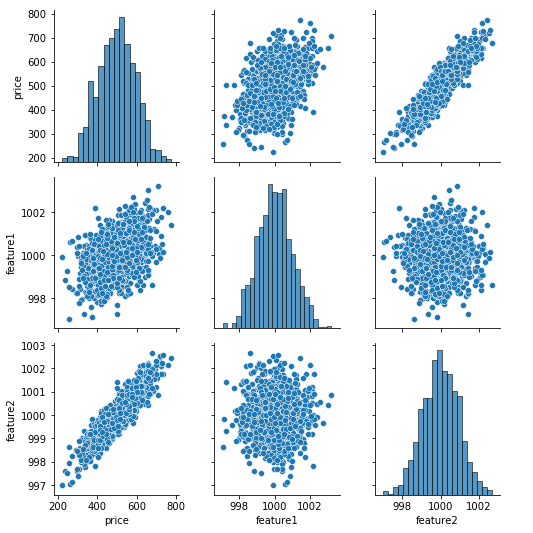

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
X.shape

(1000, 2)

In [8]:
y = df['price'].values

In [9]:
y.shape

(1000,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### While modelling having large feature value would cause the error in weights, so to be at safer side, input data is normalized and scaled

In [11]:
from sklearn.preprocessing import MinMaxScaler


In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler()

In [14]:
X_train=scaler.transform(X_train)

In [15]:
X_test=scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### There are below important to consider while designing a neural network

- All below attributes come via sequential

- how many layers ( dense )
- activation function ( dense )
- Optimizer  ( compile )
- Loss (compile )
- Epochs ( fit )
- verbose ( fit )


In [17]:
# 

# model = Sequential([Dense(4, activation = 'relu'),
#                    Dense(2, activation = 'relu'),
#                    Dense(1)])  # 4 neurons

In [38]:
# another way to initiate a model

model = Sequential()

model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))

model.add(Dense(1))

In [39]:
## for multiclass classification - 
#         optimizer = 'rmsprop' 
#         loss = 'categorical_crossentropy'
#          metrics = ['accuracy']


## for binary classification
#         optimizer = 'rmsprop'
#         loss = 'binary_crossentropy'
#         metrics = ['accuracy']

## for regression problem
#         optimizer = 'rmsprop'
#         loss = 'mse'
#         metrics = ['accuracy']


model.compile(optimizer = 'rmsprop', loss = 'mse')

In [40]:
model.fit(x=X_train, y= y_train,epochs= 250, verbose = 0)

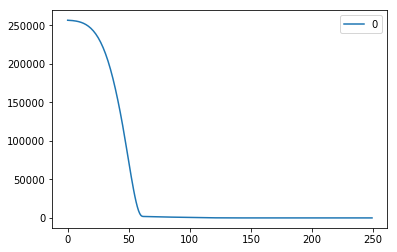

In [41]:
pd.DataFrame(model.history.history['loss']).plot()

## Evaluation of neural network

In [42]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 25.1814


25.18136215209961

In [43]:
## above result from evaluate command bring the MSE score as, in model declaration it was specified.

In [44]:
model.evaluate(X_train, y_train)

21/21 [==============================] - 0s 3ms/step - loss: 24.7458


24.74579620361328

In [45]:
y_pred=model.predict(X_test)

In [46]:
df_pred = pd.DataFrame(y_pred.reshape(330,))

In [47]:
df_pred['True_value'] = y_test

In [48]:
df_pred.rename(columns = {0:'prediction'}, inplace= True)

In [49]:
df_pred.head()

,prediction,True_value
0,406.181946,402.296319
1,624.887451,624.156198
2,593.433838,582.455066
3,573.421692,578.588606
4,367.341644,371.224104


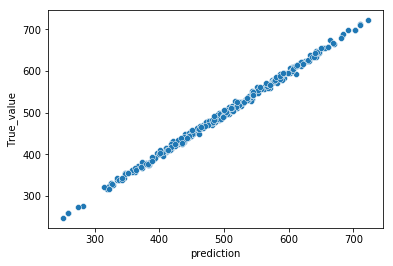

In [50]:
sns.scatterplot(x='prediction',y='True_value',data=df_pred)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
mean_absolute_error(y_pred.ravel(),y_test)
mean_absolute_error(df_pred['True_value'],df_pred['prediction'])

4.04793627570083

In [53]:
np.sqrt(mean_squared_error(y_pred.ravel(),y_test))

5.018104209688597

### predicting for some random data

In [56]:
new = [[900,1000]]

In [58]:
new=scaler.transform(new)

In [59]:
model.predict(new)

array([[113.02776]], dtype=float32)

### Saving the model at local machine and loading it back for further use

In [60]:
from tensorflow.keras.models import load_model

In [61]:
model.save('price_tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: price_tf\assets


In [62]:
load_model = load_model('price_tf')

In [63]:
load_model.predict(new)

array([[113.02776]], dtype=float32)